# Análise de dados de Inadimplência

## 1\.Introdução
___

Vamos explorar dados de crédito de uma Instituição financeira. Nosso objetivo é compreender quais os processos em que um cliente adimplente segue até se tornar inadimplente, e buscar algum padrão dentre esses clientes. Para isso, vamos analisar os elementos presentes no nosso banco de dados. 

## 2\.Exploração de Dados
___

Como foi supracitado, queremos compreender a inadimplencia. Para tal propósito
segue um exemplo de como funionará nossa tabela de dados. Na qual `default = 0` representa clientes adimplentes e `default = 1` representa o inverso.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


importar pacotes necessários

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Geração de dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### 2.1\.Estrutura
---

In [3]:
total_clientes,_ = df.shape
print(f'{total_clientes} Clientes')

10127 Clientes


In [4]:
clientes_adimplentes,_ = df[df['default']==0].shape
print(f'{clientes_adimplentes} Clientes adimplentes')

8500 Clientes adimplentes


In [5]:
clientes_inadimplentes,_ = df[df['default']==1].shape
print(f'{clientes_inadimplentes} Clientes inadimplentes')

1627 Clientes inadimplentes


Portanto

In [6]:
print(f'A proporção de Clientes Adimplentes é de {round(100*(clientes_adimplentes/total_clientes),2)}%')
print(f'A proporção de Clientes Inadimplentes é de {round(100*(clientes_inadimplentes/total_clientes),2)}%')

A proporção de Clientes Adimplentes é de 83.93%
A proporção de Clientes Inadimplentes é de 16.07%


### 2.2\.Schema
---

Schema é a discussão entre o _**tipo da informação**_ que aquela _**coluna**_ ta representando e o _**tipo de dado**._

In [7]:
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Perceba que a as colunas `'valor_transacoes_12m'` e `'limite_credito'` estão com o tipo de dado `objects`, porém como se trata de dinheiro, precisamos desses dados como números `floats`. 

- Atributos categóricos


In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


- Atributos numéricos

In [10]:
#Removendo o id porque não entra em nossas análises.
df.drop('id',axis=1).describe()

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


### 2.3\.Dados faltantes
---

- Vendo quais colunas possuem dados faltantes.

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Percebe-se que as colunas `escolaridade, estado_civil e salario_anual` possuem dados faltantes. Vamos verificar a quantidade de cada tipo de dado faltante

In [12]:
df.isnull().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [13]:
print(f'escolaridade: {round(100*(df.isnull().sum()["escolaridade"]/df.shape[0]),2)}% de dados faltantes')
print(f'estado_civil: {round(100*(df.isnull().sum()["estado_civil"]/df.shape[0]),2)}% de dados faltantes')
print(f'salario_anual: {round(100*(df.isnull().sum()["salario_anual"]/df.shape[0]),2)}% de dados faltantes')

escolaridade: 15.0% de dados faltantes
estado_civil: 7.4% de dados faltantes
salario_anual: 10.98% de dados faltantes


## 3\.Tratamento e limpeza de dados
---

Como podemos ver acima, temos que tratar dois tipos de infomações. A primeira é alterar o tipo de dado das colunas  `'valor_transacoes_12m' e 'limite_credito'`
e a outra é cuidar e analisar os dados faltantes.

### 3.1\.Correção do Schema
---

In [14]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Aplicando uma função sobre as colunas na qual queremos alterar os tipos de dados

In [15]:
df['limite_credito'] = df['limite_credito'].apply(lambda x : float(x.replace('.','').replace(',','.')))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda x : float(x.replace('.','').replace(',','.')))

Verificando novamente os tipos de dados

In [16]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

perceba que agora sim podemos incluir as duas colunas nas nossas análises

### 3.2\.Tratando os dados Faltantes
---

**Essa era nossa proporção antes da remoção dos dados**


In [17]:
print(f'A proporção de Clientes Adimplentes é de {round(100*(clientes_adimplentes/total_clientes),2)}%')
print(f'A proporção de Clientes Inadimplentes é de {round(100*(clientes_inadimplentes/total_clientes),2)}%')

A proporção de Clientes Adimplentes é de 83.93%
A proporção de Clientes Inadimplentes é de 16.07%


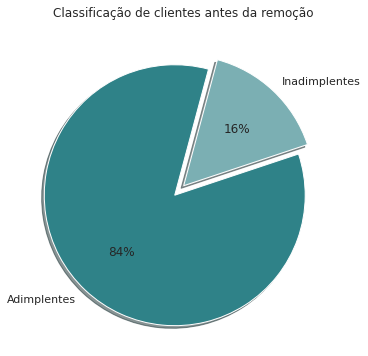

In [88]:
data = [df[df['default']==0].shape[0], df[df['default']==1].shape[0]]
labels = ['Adimplentes', 'Inadimplentes']

explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(6,6))

ax1.pie(data, labels=labels,explode=explode,shadow=True,startangle=75,colors=sns.diverging_palette(200, 200, s=85), autopct='%.0f%%')
ax1.set_title('Classificação de clientes antes da remoção')

plt.show()

Removendo as linhas com dados faltantes

In [19]:
df.dropna(inplace=True)

In [20]:
total_clientes_novo,_ = df.shape
print(f'{total_clientes_novo} Clientes')

7081 Clientes


In [21]:
clientes_adimplentes_novo,_ = df[df['default']==0].shape
print(f'{clientes_adimplentes_novo} Clientes adimplentes')

5968 Clientes adimplentes


In [22]:
clientes_inadimplentes_novo,_ = df[df['default']==1].shape
print(f'{clientes_inadimplentes_novo} Clientes inadimplentes')

1113 Clientes inadimplentes


**Proporção após a remoção de dados** 

In [23]:
print(f'A proporção de Clientes Adimplentes é de {round(100*(clientes_adimplentes_novo/total_clientes_novo),2)}%')
print(f'A proporção de Clientes Inadimplentes é de {round(100*(clientes_inadimplentes_novo/total_clientes_novo),2)}%')

A proporção de Clientes Adimplentes é de 84.28%
A proporção de Clientes Inadimplentes é de 15.72%


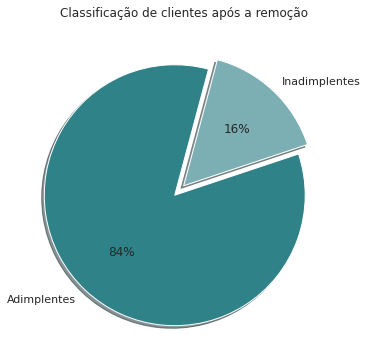

In [87]:
data = [df[df['default']==0].shape[0], df[df['default']==1].shape[0]]
labels = ['Adimplentes', 'Inadimplentes']

explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(6,6))

ax1.pie(data, labels=labels,explode=explode,shadow=True,startangle=75,colors=sns.diverging_palette(200, 200, s=85), autopct='%.0f%%')
ax1.set_title('Classificação de clientes após a remoção')

plt.show()

Fica claro que após a remoção, praticamente não houve diferença no percentual de inadimplencia entre clientes. Então podemos seguir com nossas análises agora com essa nova base de dados, que teremos uma excelente precisão.

## 4\.Análise e visualisação de dados
---

Os dados estão prontos para análise, agora vamos criar visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [25]:
df_adimplente = df[df['default']==0]

In [26]:
df_inadimplente = df[df['default']==1]

### 4.1\.Atributos **Categóricos**
---

In [27]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


- Analisando a coluna ***escolaridade***

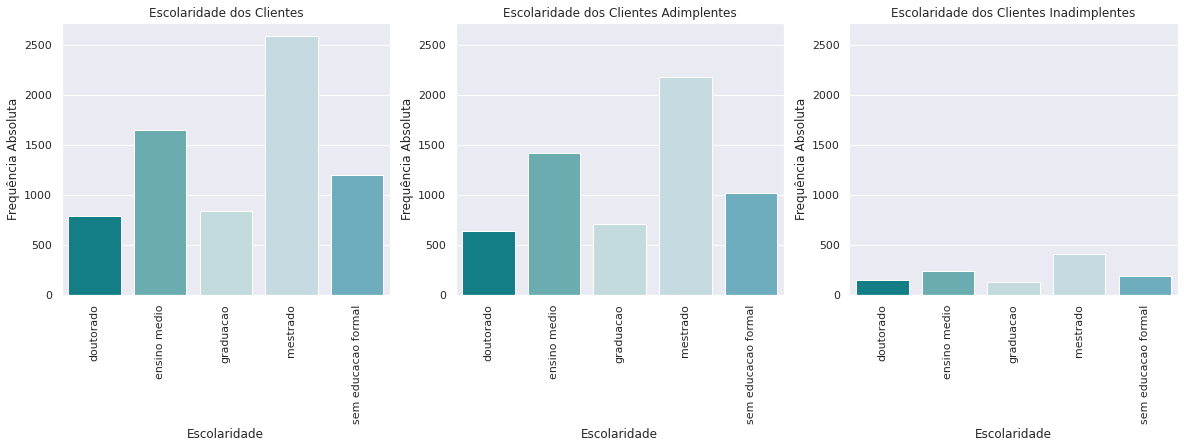

In [86]:
sns.set_theme(style="darkgrid", palette=sns.diverging_palette(200, 215, s=180))

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

- ***Salario Anual***

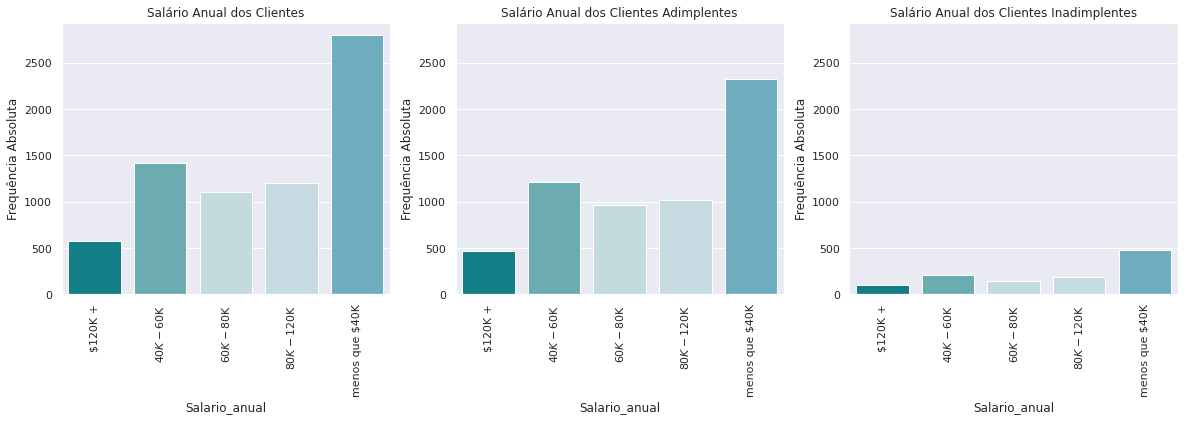

In [85]:
sns.set_theme(style="darkgrid", palette=sns.diverging_palette(200, 215, s=180))
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

- ***Tipo de cartão***

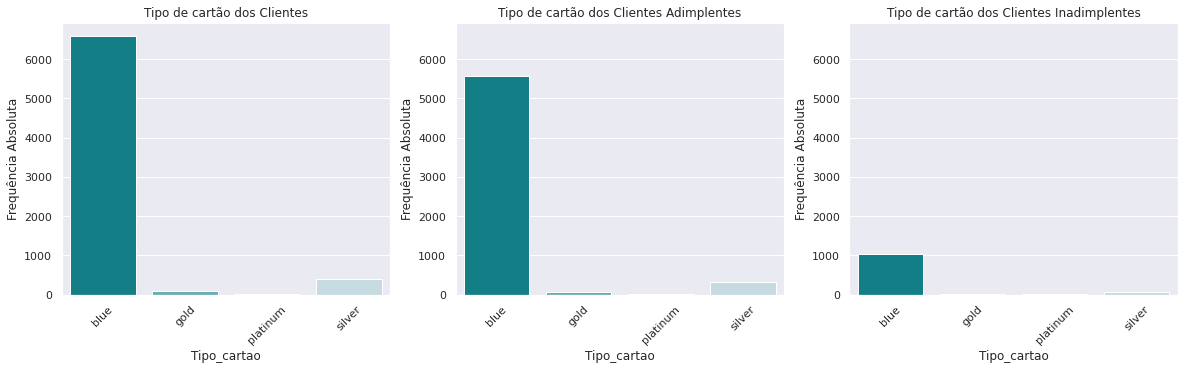

In [84]:
sns.set_theme(style="darkgrid", palette=sns.diverging_palette(200, 215, s=180))
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos Clientes', 'Tipo de cartão dos Clientes Adimplentes', 'Tipo de cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

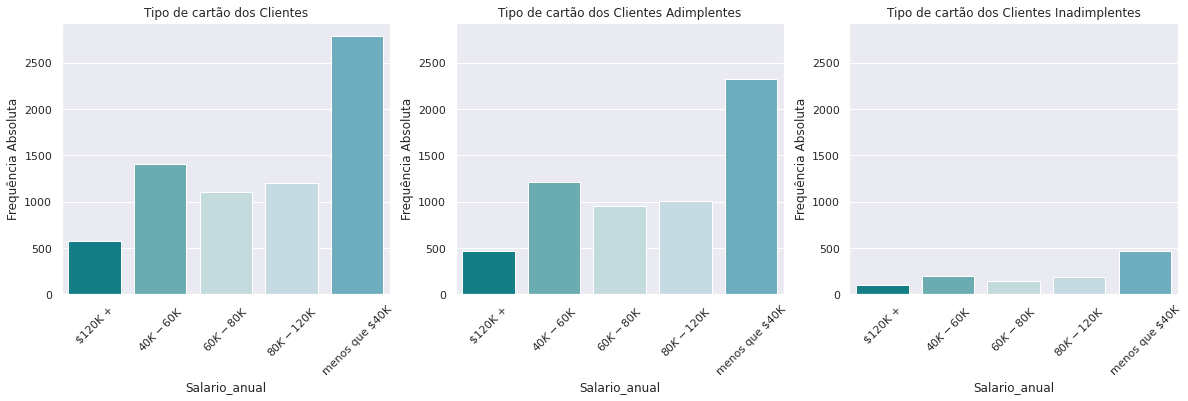

In [83]:
sns.set_theme(style="darkgrid", palette=sns.diverging_palette(200, 215, s=180))
coluna = 'salario_anual'
titulos = ['Tipo de cartão dos Clientes', 'Tipo de cartão dos Clientes Adimplentes', 'Tipo de cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

***Conclusão***:
- Ao analisarmos esses atributos categóricos percebemos que ele não nos explica muita coisa que correlacione com o porquê de os clientes se tornarem inadimplentes.
- Perceba nos  gráficos que o padrão sempre é o mesmo para, os clientes em geral, os adimplentes e os inadimplentes. Havendo apenas uma diferença na frequência absoluta, uma vez que os adimplentes ocupam 84% da base de dados. 

### 4.2\.Atributos ***Numéricos***
---

In [31]:
df.drop(['id','default'],axis=1).head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


- Inicialmente, cabe verificar a correlação entre os elementos numéricos. Para visualizar se uma coluna possui uma proporcionalidade.

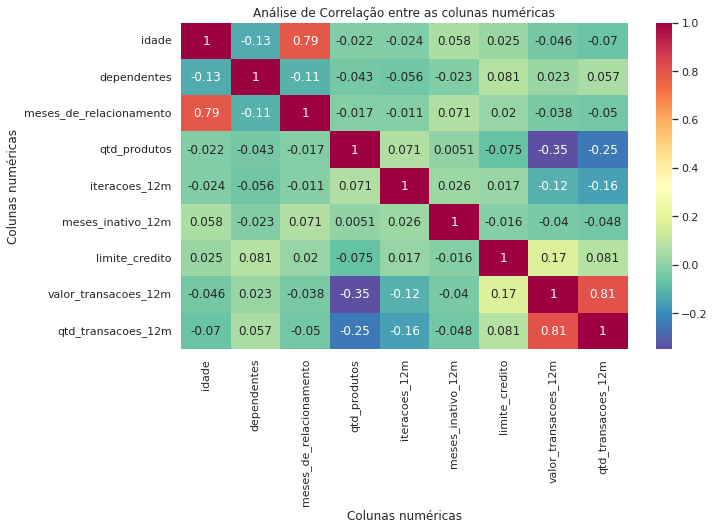

In [81]:
df_clear = df.drop(["id","default"],axis=1) #Removendo as colunas que não nos interessam.

plt.figure(figsize=(10,6));
f = sns.heatmap(df_clear.corr(), annot=True, cmap='Spectral_r') 

f.set(title="Análise de Correlação entre as colunas numéricas", xlabel='Colunas Numéricas'.capitalize(), ylabel='Colunas numéricas')
plt.show(f)

Portanto, aqui ele nos apresenta um fato muito interessante que podemos explorar com mais detalhes, que é a relação entre o valor de transações no ano e a quantidade de transações anuais. Ao ver o gráfico de calor, fica bem nítido que elas possuem essa correlação.

***Quantidade de transações anuais***

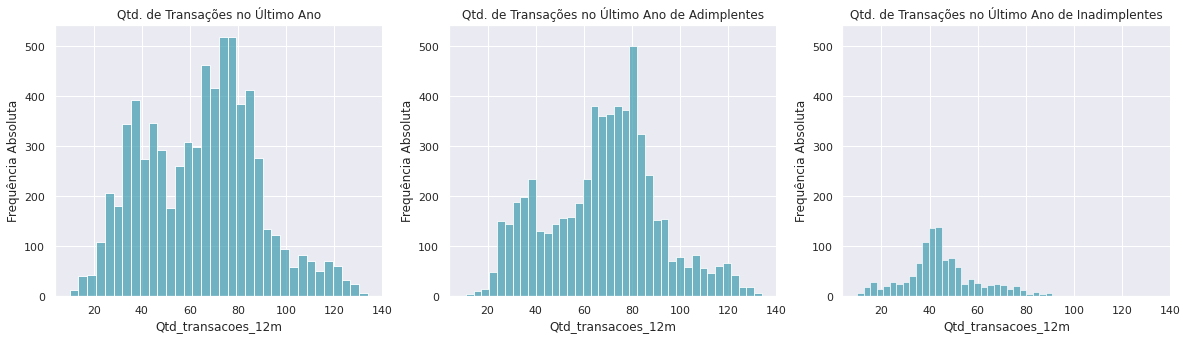

In [80]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

***Valor das transações anuais***

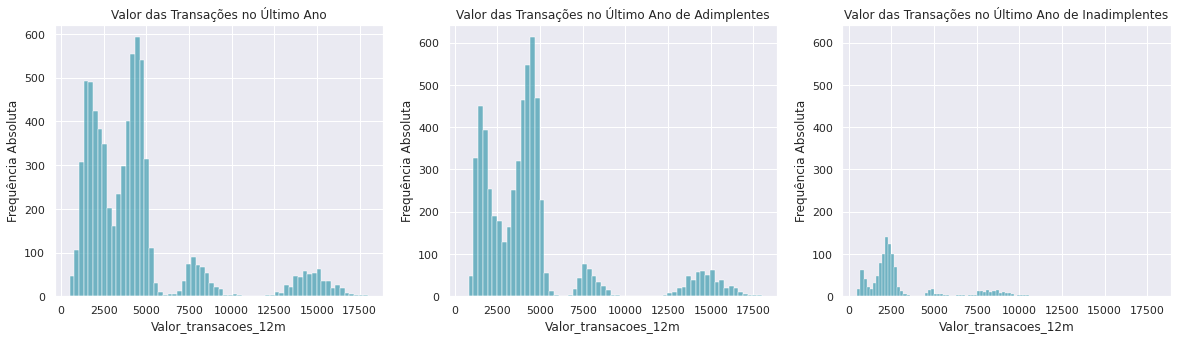

In [79]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Observando se o ***Limite de crédito*** tem alguma relação 

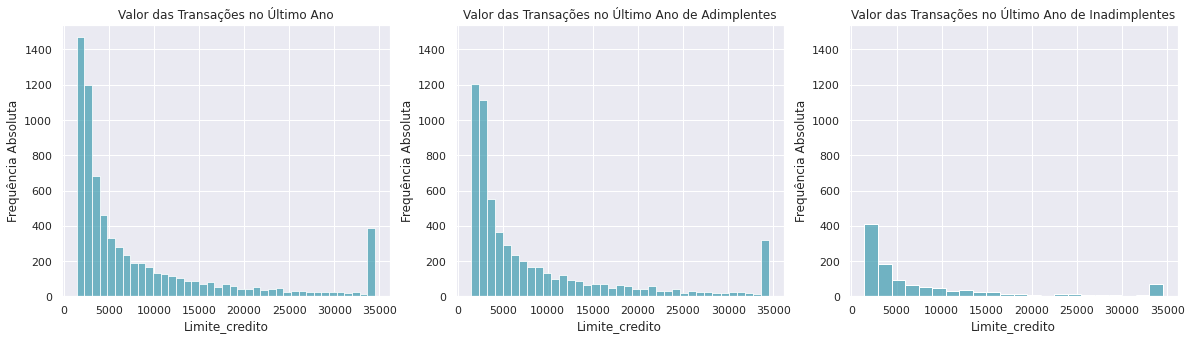

In [90]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
coluna = 'limite_credito'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

- Aparentemente, sozinho o limite de crédito não nos ajuda muito, vamos relacionar esses 3 tipos de dados e verificar a relação entre eles, já sabendo que a quantidade de transações anuais e os seus respectivos valores, nos explicam muita coisa sobre os futuros inadimplentes.

Relacionado esses dados

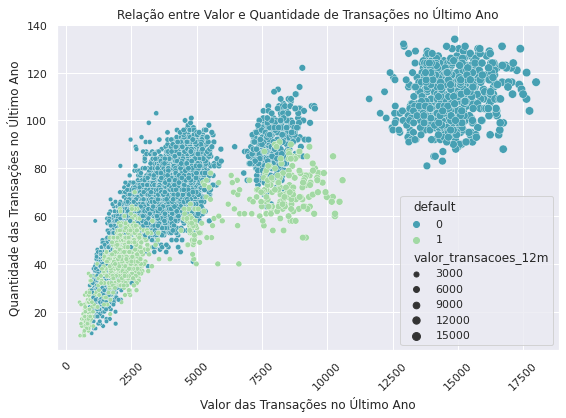

In [78]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
plt.figure(figsize=(9,6));
f = sns.scatterplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df,hue='default',size='valor_transacoes_12m')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

plt.xticks(rotation=45);
plt.show();

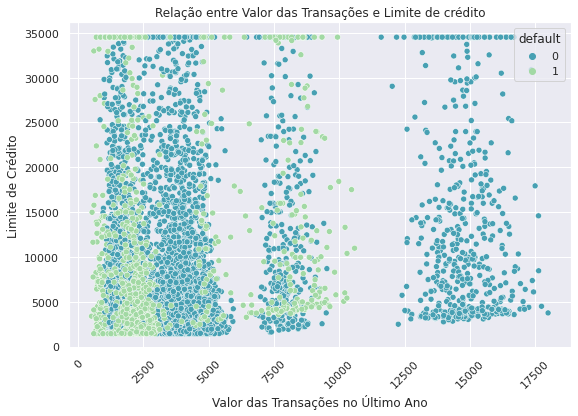

In [77]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
plt.figure(figsize=(9,6));
f = sns.scatterplot(x='valor_transacoes_12m', y='limite_credito', data=df,hue='default')
_ = f.set(
    title='Relação entre Valor das Transações e Limite de crédito', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Limite de Crédito'
  )

plt.xticks(rotation=45);
plt.show();

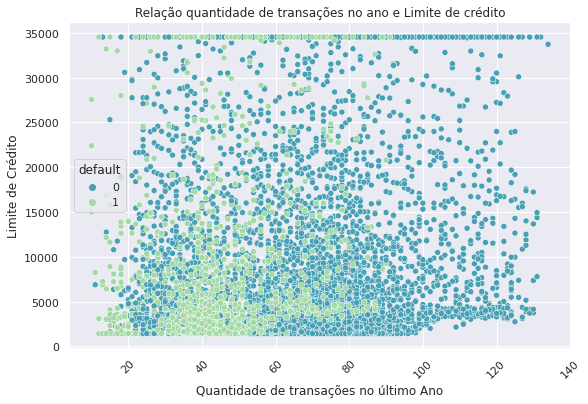

In [101]:
sns.set_theme(style="darkgrid", palette=sns.color_palette("Spectral_r"))
plt.figure(figsize=(9,6));
f = sns.scatterplot(x='qtd_transacoes_12m', y='limite_credito', data=df,hue='default')
_ = f.set(
    title='Relação quantidade de transações no ano e Limite de crédito', 
    xlabel='Quantidade de transações no último Ano', 
    ylabel='Limite de Crédito'
  )

plt.xticks(rotation=45);
plt.show();

## 5\.Conclusão Geral

Inicialmente, cabe destacar que o nosso objetivo é compreender quais os processos em que um cliente adimplente segue até se tornar inadimplente, e buscar algum padrão dentre esses clientes, para que possamos oferecer algum tipo de serviço especial ou entrar em contato com aqueles clientes para buscar conhecimento sobre sua situação com a empresa.


Posto isso, vamos para alguns padrões:

- Clientes que fazem entre 30 a 60 transações no ano, são os clientes de maior probabilidade de se tornarem inadimplentes. Mas há uma pequena parcela de clientes que fazem entre 60 e 80 transações anuais que também se tornam inadimplentes, o que não poderia ser ignorado.


- Ademais, clientes que fazem transações anuais num valor de até `R$ 3000,00` são a maior parte dos clientes que se tornam inadimplentes no futuro. Apesar de ser a minoria, não podemos negligenciar os clientes que transacionam valores de `R$ 5000,00` até `R$ 10000,00` 

- Além disso, clientes inadimplentes em sua maioria, possuem limites de crédito inferior à `R$ 15000,00`.

Confluenciando essas informações, teremos um filtro de usuários que seguem precisamente os passos de clientes que se tornam inadimplentes. Nos dando a liberdade de trabalhar sobre esses clientes para que possamos reduzir ao máximo esse crescimento de maus pagadores e então continuar o desenvolvimento da instituição.